In [1]:
import tensorflow as tf

https://blog.csdn.net/lenbow/article/details/52218551

不仅可以优化更新训练的模型参数，也可以为`全局步骤 / global step`计数

In [ ]:
clip_by_global_norm:修正梯度值
    用于控制梯度爆炸的问题。梯度爆炸和梯度弥散的原因一样，都是因为链式法则求导的关系，导致梯度的指数级衰减。为了避免梯度爆炸，需要对梯度进行修剪。
In [9]:

gradients, vriables = zip(*optimizer.compute_gradients(goal))
gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
train_step = optimizer.apply_gradients(zip(gradients, vriables))
train()



In [ ]:

exponential_decay 加入学习率衰减：
In [10]:

# global_step 记录当前是第几个batch
global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(
    3.0, global_step, 3, 0.3, staircase=True)
optimizer2 = tf.train.GradientDescentOptimizer(learning_rate)
gradients, vriables = zip(*optimizer2.compute_gradients(goal))
gradients, _ = tf.clip_by_global_norm(gradients, 1.25)
train_step = optimizer2.apply_gradients(zip(gradients, vriables), 
                                       global_step=global_step)
with tf.Session() as sess:
        global_step.initializer.run()
        x.initializer.run()
        for i in range(10):
            print "x: ", x.eval()
            train_step.run()
            print "goal: ",goal.eval()



# Cross Entropy

In [ ]:
# 基本流程
import tensorflow as tf
from numpy.random import RandomState

batch_size=8

w1 = tf.Variable(tf.random_normal([2,3],stddev=1,seed=1))
w2 = tf.Variable(tf.random_normal([3,1],stddev=1,seed=1))

x = tf.placeholder(tf.float32,shape=(None,2),name='x_input')
y_ = tf.placeholder(tf.float32,shape=(None,1),name ='y_input')

a = tf.matmul(x,w1)
y = tf.matmul(a,w2)

#tf.clip_by_value()可以将计算的数值限制在一个范围内（1e-10~1.0）
#y_表示真实值，y表示预测值，定义的是交叉熵损失函数
#对于回归问题，最常用的损失函数是均方误差（MSE）mse = tf.reduce_mean(tf.square(y_-y))
cross_entropy = -tf.reduce_mean(
            y_*tf.log(tf.clip_by_value(y,1e-10,1.0)))
#多分类问题适合softmax+cross_entrpy
#cross_entropy2 = tf.nn.softmax_cross_entropy_with_logits(y,y_)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

rdm = RandomState(1)
dataset_size=128
X = rdm.rand(dataset_size,2)
Y = [[int(x1+x2<1)] for (x1,x2) in X]

with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    
    steps = 5000
    for i in range(steps):
        start = (i*batch_size)%dataset_size
        end = min(start+batch_size,dataset_size)
        
        sess.run(train_step,feed_dict = {x:X[start:end],y_:Y[start:end]})
        if i%1000==0:
            total_cross_entropy = sess.run(
                cross_entropy,feed_dict={x:X,y_:Y})
            print("After %d training_step(s) ,cross_entropy on all data is %g"%(i,total_cross_entropy))

In [ ]:
学习率的设置 / 指数衰减法

通过这个函数，可以先使用较大的学习率来快速得到一个比较优的解，然后随着迭代的继续逐步减小学习率，使得模型在训练后期更加稳定

In [ ]:
decay_learning_rate = \
    learning_rate * dacay_rate ^ (global_step / decay_steps)

In [ ]:
decay_learning_rate 为每一轮优化时使用的学习率
decay_steps 为衰减速度

In [ ]:
可以通过设置参数 staircase 选择不同的衰减方法大

In [ ]:
staircase = False
    学习率随迭代轮数变化为连续的
staircase = True
    gloabl_step / decay_step 会被转化为整数
    这使得学习率成为一个阶梯函数 staircase function
    
        在这样的设置下，decay_steps 通常代表完成的使用一便训练数据所需要的迭代轮数
        这个迭代轮数也就是总训练样本数除以每一个 batch 中的训练样本数
        
        这种设置的常用场景就是每完整地过完一遍训练数据，学习率就减小一次
        这可以使得训练数据集中的所有数据对模型训练有相等的作用

In [ ]:
- 学习速率衰减
    tf.train.exponential_decay
- 过拟合 -> 正则化
    tf.contrib.layers.l1_l2_regularizer
    tf.get_collection
    tf.add_to_collection
    tf.add_n
- ExponentialMovingAverage / 滑动平均模型
    tf.train.ExponentialMovingAverage

In [ ]:
**`tf.train.exponential_decay`**

In [ ]:
if False:
    global_step = tf.Variable(0)
    
    # 通过 exponential_decay 函数来生成学习率
    leanring_rate = tf.train.exponential_decay(
        0.1, global_step, decay_steps=100, decay_rate=0.96, staircase=True
    )
    
    # 使用'指数衰减学习率'
    # 在 minimize 函数中传入 global_step, 并将自动更新 global_step 参数
    # 从而使得学习率也得到相应更新
    optimizer = tf.train.GradientDescentOptimizer(leanring_rate)
    learning_step = optimizer.minimize(...my_loss.., global_step=global_step)

In [1]:
import tensorflow as tf

In [ ]:
**`Overfit`**

In [ ]:
当一个模型过为复杂之后，它可以很好地'记忆'每一个训练数据中随机噪声的部分而忘记了要去'学习'训练数据中通用的趋势

In [ ]:
weight = tf.constant([[1.0, -2.0], [-3.0, 4.0]])

with tf.Session() as sess:
    l1 = tf.contrib.layers.l1_regularizer(.5)(weight)
    l2 = tf.contrib.layers.l2_regularizer(.5)(weight)
    l1_l2 = tf.contrib.layers.l1_l2_regularizer(.5, .5)(weight)
    
    print(sess.run(l1))
    print(sess.run(l2))
    print(sess.run(l1_l2))

In [ ]:
```python
w = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x, w)

loss = tf.reduce_mean(tf.square(y_ - y))
reg = tf.contrib.layers.l2_regularizer(lambda)(w)

loss = loss + reg
```

In [ ]:
使用 collection

In [ ]:
def get_weight(shape, lambda):
    reg = tf.contrib.layers.l2_regularizer(lambda)
    
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('loss', reg(var))
    
    return var

x  = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
batch_size = 8

# 每一层网络中的节点个数
layer_dim = [2, 10, 10, 10, 1]
# layers of NN
n_layers = len(layer_dim)

# 这个变量维护向前传播时最深层的节点，开始的时候就是输入层
cur_layer = x
# 当前层的节点个数
in_dim = layer_dim[0]

# 通过一个循环生成 5 层 FC-nn
for i in range(1, n_layers):
    out_dim = layer_dim[i]
    weight = get_weight([in_dim, out_dim], 0.001)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dim]))
    
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    in_dim = layer_dim[i]
    
mse_loss = tf.reduce_mean(tf.square(y_ - cur_layer))

# 将均方误差加入到'loss'集合中
tf.add_to_collection('loss', mse_loss)

# tf.get_collection 返回一个列表，这个列表是所有这个集合中的元素
loss = tf.add_n(tf.get_collection('loss'))


In [3]:
for i in range(1,5):
    print(i)

1
2
3
4


**`Exponential Moving Average`**

In [ ]:
var = tf.Variable(0, dtype=tf.float32)

# 模拟社交网络迭代轮数, 动态控制衰减率
step = tf.Variable(0, trainable=False)

# 定义一个滑动平均累
ema = tf.train.ExponentialMovingAverage(decay=0.99, num_updates=step)

# 定义一个滑动平均的操作
# 这里需要给定一个列表, 每次执行这个操作时, 列表里的元素都会被更新
maintain_average_op = ema.apply([var])

In [ ]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print(sess.run([var, ema.average(var)]))

    # 更新v1的滑动平均值，衰减率为min{0.99,(1+step)/(10+step)=0.1}=0.1,
    # 所以v1的滑动平均被更新为0.1*0+0.9*5=4.5
    sess.run(tf.assign(var, 5))
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))
    
    # decay = min{0.99, (1+step)/(10+step)} = 0.99
    # 0.99 * 4.5 + 0.01 * 10 = 4.555
    sess.run(tf.assign(step, 10000))
    sess.run(tf.assign(var, 10))
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))
    
    # 0.99 * 4.555 + 0.01 * 10
    sess.run(maintain_average_op)
    print(sess.run([var, ema.average(var)]))

在初始化 ExponentialMovingAverage 时，需要提供一个衰减率 'decay'
这个衰减率将用于控制模型更新的速度
ExponentialMovingAverage 对每一个变量会维护一个影子变量 (shadow variable), 这个影子变量的初始值就是相应变量的初始值，而每次运行变量更新时，影子变量的值会更新为：
    shadow_variable = decay * shadow_variable + (1-decay) * variable

In [ ]:
shadow_variable 影子变量
variable 带更新的变量
decay 衰减率，decay 决定了模型更新的速度，decay 越大模型越趋于稳定，一般将其设定为接近于 1 的数，(0.999，0.9999)

In [ ]:
为了使得模型在训练前期可以更新的更快，ExponentialMovingAverage 还提供了 num_updates 参数
min{decay, (1+num_updates)/(10+num_updates)}

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
通过 input_data.read_data_sets 函数生成的类会自动将 MNIST 数据集划分为 train、validation、test 三个数据集

SyntaxError: invalid syntax (<ipython-input-4-ba8ee6aad98e>, line 1)

In [5]:
print("Trainning data size:", mnist.train.num_examples)
print("Validating data size:", mnist.validation.num_examples)
print("Testing data size:", mnist.test.num_examples)

#print("Example trainning data:", mnist.train.images[0])
print("Example traingning data label:", mnist.train.labels[0])

print("Trainning data shape:", mnist.train.images.shape)

Trainning data size: 55000
Validating data size: 5000
Testing data size: 10000
Example traingning data label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Trainning data shape: (55000, 784)


In [ ]:
为了方便使用随机梯度下降，input_data.read_data_sets 函数生成的类还提供了 minist.train.next_batch 函数
它可以从所有的训练数据中读取一小部分作为一个训练 batch

In [6]:
batch_size = 100
xs, ys = mnist.train.next_batch(batch_size)

print("X shape:", xs.shape)
print("Y shape:", ys.shape)

X shape: (100, 784)
Y shape: (100, 10)


In [7]:
INPUT_NODE = 784
OUTPUT_NODE = 10

LAYER1_NODE = 500
BATCH_SIZE = 100

LEARNING_RATE_BASE  = 0.8
LEARNING_RATE_DECAY = 0.99

REGULARIZATION_RATE = 0.0001
TRAINING_STEPS = 30000
MOVING_AVERAGE_DECAY = 0.99

In [ ]:
5.2.1 Tensorflow MNIST Code

In [ ]:
虽然一个神经网络模型的效果最终是通过测试数据来评判的，但是我们不能直接通过模型在测试数据上的效果来选择参数
使用测试数据来选取参数可能会导致神经网络模型过度拟合测试数据，从而失去了对为止数据的预判能力

不同问题的数据分布不一样，如果验证数据分布不能很好地代表测试数据分布，那么模型在这两个数据集上的表现就有可能不一样

一般来说选取的验证数据分布越接近测试数据分布，模型在验证数据上的表现越可以体现模型在测试数据上的表现

In [ ]:
# 不同模型效果比较

In [ ]:
Chapter.04 - Optimizer 5 method
- 神经网络结构设计上
    激活函数
    多层隐藏层
- 神经网络优化
    指数衰减的学习率
    加入正则化的损失函数
    滑动平均模型

使用 '滑动平均模型、指数衰减的学习率、正则化' 带来的正确率的提升并不是很明显

是因为 '滑动平均模型和指数衰减的学习率' 在一定程度上都是限制神经网络中参数更新的速度

当问题更加复杂时，迭代不会这么快接近收敛，这时滑动平均模型和指数衰减的学习率可以发挥更大的作用

In [4]:

print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)

import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 784])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

tf.global_variables_initializer().run()

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_step.run({x: batch_xs, y_: batch_ys})

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
0.9196


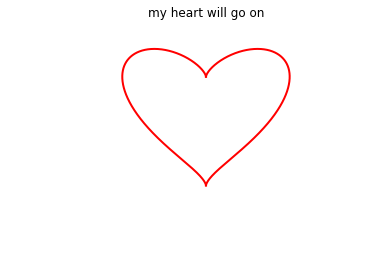

In [11]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import math


t = np.linspace(0, math.pi, 1000)
x = np.sin(t)
y = np.cos(t) + np.power(x, 2.0/3)
plt.plot(x, y, color='red', linewidth=2)
plt.plot(-x, y, color='red', linewidth=2)
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.axis('off')
plt.title("my heart will go on")
plt.show()